# Regression Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV

In [2]:
ccfraud_data = pd.read_csv('creditcard.csv')
ccfraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
ccfraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


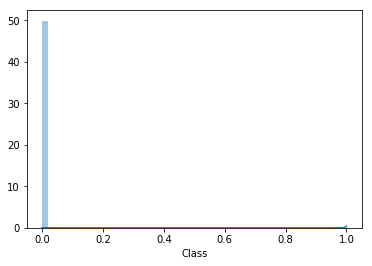

In [4]:
sns.distplot(ccfraud_data['Class']);

In [5]:
ccfraud_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# a very high percentage is class 0s
284315/(284315+492)

0.9982725143693799

In [7]:
# One issue with this dataset is that there is a severe class imbalance and there are extremely few class 1s in this data set

lr = LogisticRegression(C=1e9)

# Define variables
x = ccfraud_data.drop('Class', axis = 1)
y = ccfraud_data['Class']

# Fit model
fit = lr.fit(x, y)

def printStuff(reg):
# Get results
    print('Coefficient')
    coef = fit.coef_
    print(coef)
    print(fit.intercept_)

    # Get predictions
    pred_y = reg.predict(x)

    print('\nAccuracy by fraud status')
    print(pd.crosstab(pred_y, y))

    scores = cross_val_score(reg, x, y, cv=5)
    print('\nPercentage accuracy')
    print(scores)
    print('Mean:', scores.mean())
printStuff(lr)

Coefficient
[[ -7.12203899e-05   3.19003102e-01  -4.84127665e-01  -7.93512451e-01
    1.20293487e-01   5.74900362e-02  -5.40508875e-02   3.35310471e-01
   -3.74351733e-01  -3.88608852e-01  -2.07048473e-01  -2.86745340e-01
    1.86463565e-02  -3.06675354e-01  -6.94621516e-01  -4.27801270e-01
   -2.94742135e-01  -4.39988395e-01   3.10689827e-02   2.65186398e-02
    9.20026619e-02   2.48888476e-01   3.51031522e-01   6.77177450e-02
   -2.44442285e-02  -3.56187031e-01   6.07211005e-02  -8.88575849e-02
    2.77996368e-02  -5.58258896e-03]]
[-1.62885684]

Accuracy by fraud status
Class       0    1
row_0             
0      284240  203
1          75  289

Percentage accuracy
[ 0.99181911  0.99959622  0.99899932  0.99913976  0.99887642]
Mean: 0.997686166271


In [8]:
x = ccfraud_data.drop(['Class','Time', 'Amount'], axis = 1)
y = ccfraud_data['Class']

In [9]:
fit = lr.fit(x, y)
printStuff(lr)

Coefficient
[[ 0.04854649 -0.04098571  0.01410687  0.70814686  0.03675283 -0.08846289
  -0.00621392 -0.19483683 -0.23998382 -0.79046574 -0.0052795   0.04672777
  -0.32210951 -0.54966778 -0.09249387 -0.2197647  -0.00414282 -0.00212687
   0.04999712 -0.2850249   0.39271704  0.56605952 -0.10606188  0.1524221
  -0.06158067 -0.01067133 -0.65968461 -0.24490902]]
[-8.61918224]

Accuracy by fraud status
Class       0    1
row_0             
0      284273  186
1          42  306

Percentage accuracy
[ 0.99898178  0.99933289  0.99894665  0.99928021  0.99903443]
Mean: 0.999115189991


#### We have 186 false negatives and 42 false positives. This does perform better than a model that assumes all customers are class 0. Dropping the two features helped the model with false positives.

## Ridge Regression

In [10]:
x = ccfraud_data.drop('Class', axis = 1)
y = ccfraud_data['Class']

In [11]:
alphas = np.arange(0.1, 10, 1)
lr_ridge = LogisticRegression(penalty='l2')
ridge_r_squared = []
def ridge_reg():
    for a in alphas:
        lr_ridge.set_params(C=a, fit_intercept=False)
        lr_ridge.fit(x, y)
        y_pred = lr_ridge.predict(x)
        ridge_r_squared.append(lr_ridge.score(x, y))
ridge_reg()

In [12]:
ridge_r_squared

[0.99848318334872388,
 0.99852531714459269,
 0.99852531714459269,
 0.99852531714459269,
 0.9985218059949369,
 0.9985218059949369,
 0.99862714048460888,
 0.9985218059949369,
 0.9985218059949369,
 0.9985218059949369]

In [13]:
alphas[1]

1.1000000000000001

In [14]:
lr_ridge = LogisticRegression(penalty='l2', C=1.1000000000000001, fit_intercept=False)

fit = lr_ridge.fit(x, y)

printStuff(lr_ridge)

Coefficient
[[ -1.01088802e-04   4.28688771e-01  -6.76114418e-01  -1.22134191e+00
    1.56545604e-01  -6.40595589e-02  -6.84988360e-02   5.85111448e-01
   -4.35415741e-01  -5.23686242e-01  -3.26808315e-01  -4.17293021e-01
   -5.24495744e-02  -3.55837046e-01  -7.15288973e-01  -7.69392512e-01
   -4.12627214e-01  -5.73283273e-01   7.85682194e-02  -1.64828351e-02
    2.94844324e-01   4.62634856e-01   6.38538895e-01   1.88856050e-01
   -5.83489393e-03  -7.57408627e-01   1.62760249e-01  -1.44886420e-01
    5.44612066e-02  -1.11255805e-02]]
0.0

Accuracy by fraud status
Class       0    1
row_0             
0      284084  189
1         231  303

Percentage accuracy
[ 0.98616622  0.99949089  0.99894665  0.99906954  0.99827952]
Mean: 0.996390563167


In [15]:
x = ccfraud_data.drop(['Class','Time', 'V24'], axis = 1)
y = ccfraud_data['Class']
ridge_reg()

In [16]:
ridge_r_squared

[0.99848318334872388,
 0.99852531714459269,
 0.99852531714459269,
 0.99852531714459269,
 0.9985218059949369,
 0.9985218059949369,
 0.99862714048460888,
 0.9985218059949369,
 0.9985218059949369,
 0.9985218059949369,
 0.99882376486532987,
 0.99891505475637887,
 0.99892207705569036,
 0.99892558820534605,
 0.99892558820534605,
 0.99892558820534605,
 0.99892558820534605,
 0.99892558820534605,
 0.99892558820534605,
 0.99892558820534605]

In [17]:
alphas[3]

3.1000000000000001

In [18]:
lr_ridge = LogisticRegression(penalty='l2', C=3.0099999999999998, fit_intercept=False)
fit = lr_ridge.fit(x, y)
printStuff(lr_ridge)

Coefficient
[[  0.15892299  -4.76085932  -1.86412844   0.8447144   -6.12768059
    3.57834258   6.88334508  -0.48303518  -1.99225785  -3.2155292
   -0.09379642  -1.08901657  -0.2687609    0.21472914  -0.73705501
   -1.38749307  -0.34068146   1.48160671  -1.93995719  15.09614162
    5.0670128   -1.56999055   1.94781509  -0.77356657  -0.52796115
   -4.34053249   4.29347746  -0.11047022]]
0.0

Accuracy by fraud status
Class       0    1
row_0             
0      284192  183
1         123  309

Percentage accuracy
[ 0.99877111  0.99899933  0.99882376  0.99891154  0.99891154]
Mean: 0.998883454397


#### Removing the 2 features with poor coefficients reduced the false positives by a hefty amount, considering how many positives there were in the first place. This model is not as good as the normal logistic regression model 

## Lasso Regression

In [19]:
x = ccfraud_data.drop('Class', axis = 1)
y = ccfraud_data['Class']

In [20]:
alphas = np.arange(0.01, 10, 1)
lr_lasso = LogisticRegression(penalty='l1')
lasso_r_squared = []
def lasso_reg():
    for a in alphas:
        lr_lasso.set_params(C=a, fit_intercept=False)
        lr_lasso.fit(x, y)
        y_pred = lr_lasso.predict(x)
        lasso_r_squared.append(lr_lasso.score(x, y))
lasso_reg()

In [21]:
lasso_r_squared

[0.99849020564803537,
 0.99884483176326422,
 0.99884483176326422,
 0.99884483176326422,
 0.99884834291292002,
 0.99884483176326422,
 0.99883780946395273,
 0.99884834291292002,
 0.99884834291292002,
 0.99882727601498555]

In [22]:
alphas[4]

4.0099999999999998

In [ ]:
lr_lasso = LogisticRegression(penalty='l1', C=4.0099999999999998)

# Fit model
fit = lr_lasso.fit(x, y)

printStuff(lr_lasso)

Coefficient
[[ -3.79365267e-06   9.12158312e-02   4.36380460e-03  -1.06324701e-02
    6.93293345e-01   1.24370539e-01  -1.15995245e-01  -8.87453957e-02
   -1.76324314e-01  -2.81367126e-01  -8.06121568e-01  -5.93976297e-02
    8.33406007e-02  -3.27546924e-01  -5.57120411e-01  -1.13993944e-01
   -1.93225651e-01  -2.18089533e-02  -8.11544917e-03   9.27688102e-02
   -4.41968130e-01   3.88097579e-01   6.24715797e-01  -9.82526750e-02
    1.24392611e-01  -7.57165946e-02   1.16773914e-02  -7.95714469e-01
   -2.85746084e-01   8.40414977e-04]]
[-8.36159993]

Accuracy by fraud status
Class       0    1
row_0             
0      284273  184
1          42  308

Percentage accuracy
[ 0.99901689  0.99933289  0.99894665  0.99933288  0.99905198]
Mean: 0.999136256913


In [ ]:
x = ccfraud_data.drop(['Class','Time', 'Amount'], axis = 1)
y = ccfraud_data['Class']
lasso_reg()

In [ ]:
lasso_r_squared

In [ ]:
alphas[2]

In [ ]:
lr_lasso = LogisticRegression(penalty='l1', C=2.0099999999999998)

fit = lr_lasso.fit(x, y)
printStuff(lr_lasso)

#### Lasso regression model is the best model I have used. It has fewer false negatives and much fewer false positives. When it comes to targetting fraud false negatives would probably the most important to predict. 